# Feature Engineering

## Summary
- create new feature (e.g. recression periode) 
- use barplot to identify groups
- encode dummy variables for categories (used for making categorical features a column each) 
- removed unused feature

### Dependencies

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max.columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('data/cleaned_real_estate_data.csv')

In [3]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [4]:
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

### Create New Feature 
During recession - indicate if a transaction falls between 2010 and 2013.

In [14]:
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

In [15]:
df.during_recession.mean()

0.2635534084809447

In [16]:
# Alternative way
df.during_recession = df.tx_year.between(2010,2013).astype(int)

In [17]:
df['property_age'] = df.tx_year - df.year_built

In [18]:
df.property_age.min()

0

In [19]:
sum(df.property_age < 0)

0

### Remove Observation

In [21]:
df = df[df.property_age >= 0]

In [23]:
df['school_score'] = df.num_schools * df.median_school

In [25]:
df.school_score.median()

18.0

### Display Bar Plot

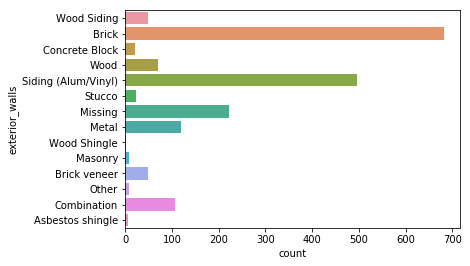

In [28]:
sns.countplot(y='exterior_walls', data=df)

Group 'Wood Siding', 'Wood Shingle' and 'Wood' together as 'Wood'

In [29]:
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

In [ ]:
other_ew = ['Stucco', 'Other', 'Asbestos shingle','Concrete Block', 'Masonry']

df.exterior_walls.replace(other_ew, 'Other', inplace=True)

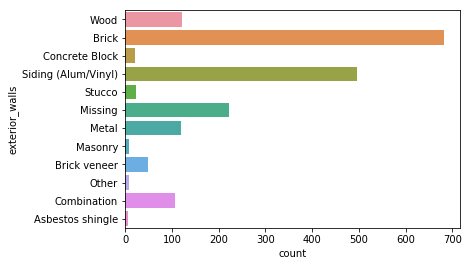

In [30]:
sns.countplot(y='exterior_walls', data=df)

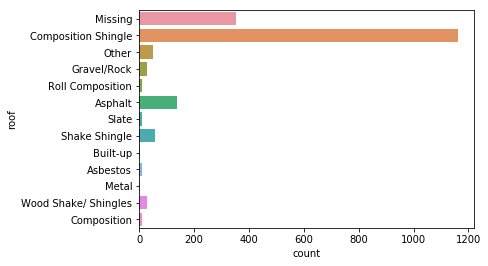

In [31]:
sns.countplot(y='roof',data=df)

In [32]:
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingles', inplace=True)

In [33]:
other_r = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal', 'Other']
df.roof.replace(other_r, 'Other', inplace=True)

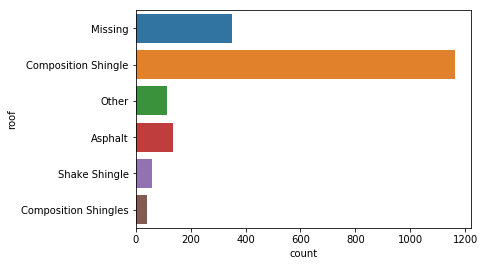

In [34]:
sns.countplot(y='roof', data=df)

### Encode Dummy Variables
Python cannot handle categorical features like our roof above. So use features directly as dummy variables (a column for each category)

In [35]:
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

In [36]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Asbestos shingle,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Concrete Block,exterior_walls_Masonry,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Stucco,exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Composition Shingles,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### Remove Unused or Redundant Features

In [37]:
df = df.drop(['tx_year', 'year_built'], axis=1)

In [39]:
df.to_csv('data/analytical_base_table.csv', index=None)